# Step1: Importing the libraries

In [174]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
#from xgboost import XGBClassifier
from matplotlib import dates
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Step 2: Loading data and EDA 


In [175]:
# load the data
data = pd.read_csv('15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv', parse_dates=['Date'])
data.sort_values('Date', inplace=True, ascending=True)
data.set_index('Date', inplace=True)
#data['id'] = data.index
data.head()

,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,0.426864,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,0.434658,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,0.433741,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,0.432366,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,0.428239,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


In [176]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close_AAPL    3774 non-null   float64
 1   Close_AMZN    3774 non-null   float64
 2   Close_GOOGL   3774 non-null   float64
 3   Close_MSFT    3774 non-null   float64
 4   Close_NVDA    3774 non-null   float64
 5   High_AAPL     3774 non-null   float64
 6   High_AMZN     3774 non-null   float64
 7   High_GOOGL    3774 non-null   float64
 8   High_MSFT     3774 non-null   float64
 9   High_NVDA     3774 non-null   float64
 10  Low_AAPL      3774 non-null   float64
 11  Low_AMZN      3774 non-null   float64
 12  Low_GOOGL     3774 non-null   float64
 13  Low_MSFT      3774 non-null   float64
 14  Low_NVDA      3774 non-null   float64
 15  Open_AAPL     3774 non-null   float64
 16  Open_AMZN     3774 non-null   float64
 17  Open_GOOGL    3774 non-null   float64
 18  Open_MSFT 

,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,...,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03,3.774000e+03,3.774000e+03,3.774000e+03,3.774000e+03
mean,67.521690,71.444840,61.149777,129.578311,13.977600,68.176227,72.272163,61.762884,130.770886,14.231440,...,67.465510,71.459697,61.128255,129.547155,13.979288,2.299200e+08,8.321625e+07,5.617230e+07,3.616344e+07,4.969955e+08
std,65.602673,61.124111,46.638356,124.987871,28.088261,66.212381,61.843003,47.144306,126.104839,28.610675,...,65.523836,61.149296,46.612714,124.977587,28.117355,2.180726e+08,5.168606e+07,4.749974e+07,2.085042e+07,3.064756e+08
min,5.779478,5.430500,10.860739,17.447613,0.203574,5.898345,5.564500,11.015403,17.682676,0.207472,...,5.789105,5.296500,10.916527,17.508276,0.199906,2.323470e+07,1.500750e+07,9.312000e+06,7.164500e+06,4.564400e+07
25%,17.461680,14.987375,22.581480,28.772202,0.411332,17.645443,15.183750,22.738201,28.981824,0.418210,...,17.465271,15.000000,22.600904,28.766031,0.412650,8.492275e+07,5.234320e+07,2.733450e+07,2.262030e+07,3.034280e+08
50%,35.323715,48.394751,47.151819,64.985474,3.544295,35.728738,48.818001,47.410334,65.429323,3.594330,...,35.354713,48.577499,47.140873,64.852778,3.515616,1.403920e+08,7.007700e+07,3.768900e+07,3.022110e+07,4.283440e+08
75%,126.909601,120.965000,93.473120,228.535389,13.567127,127.999184,122.692247,94.761573,231.254503,13.823134,...,126.339104,120.822123,93.317730,228.850363,13.597044,3.081386e+08,9.872150e+07,7.315977e+07,4.420790e+07,6.025145e+08
max,258.735504,232.929993,196.433777,464.854340,148.856064,259.814335,233.000000,201.188288,465.639777,152.865409,...,257.906429,232.389999,197.023087,464.297590,149.325985,1.880998e+09,8.484220e+08,5.923990e+08,3.193179e+08,3.692928e+09


In [177]:
# Missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

# Duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")


Number of duplicate rows: 0


### Variation Analysis
Plotting the distribution for each company's closing prices and prices over time will give better insights about the data. Volume analysis will tell us more about trading activity.

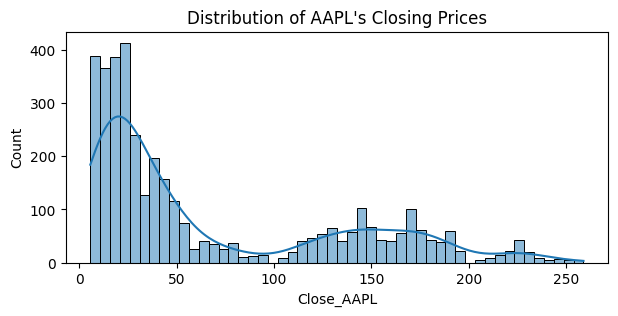

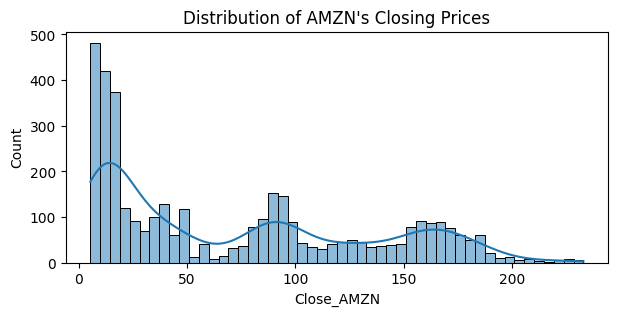

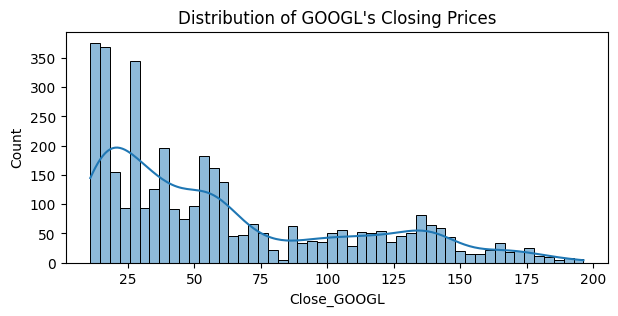

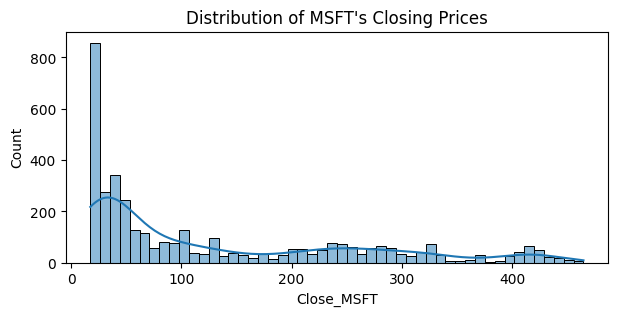

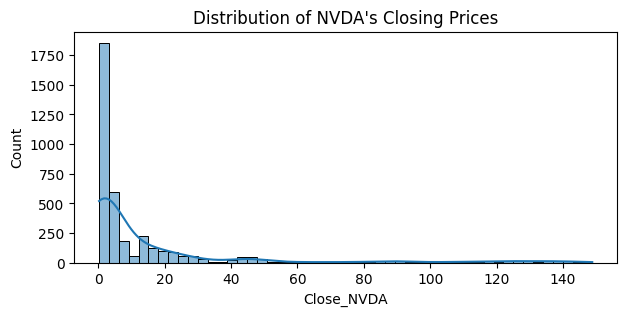

In [178]:
# Closing Price Distribution of each company
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']
for company in companies:
    plt.figure(figsize=(7,3))
    sns.histplot(data[f'Close_{company}'], kde=True, bins=50)
    plt.title(f'Distribution of {company}\'s Closing Prices')
    plt.show()


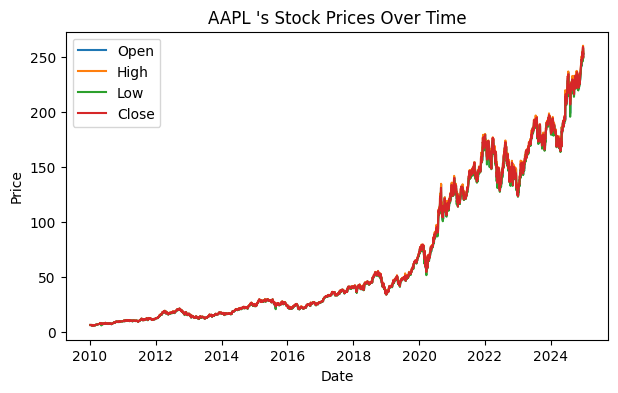

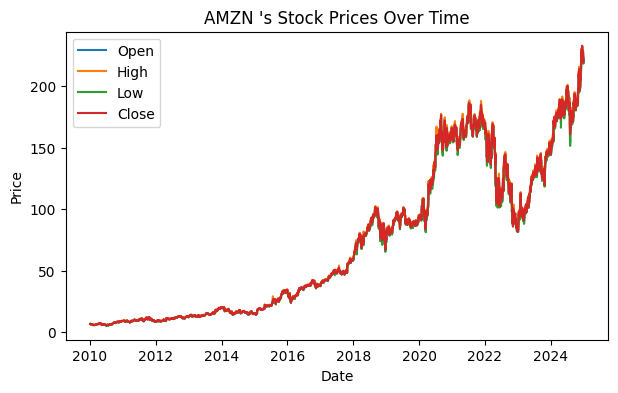

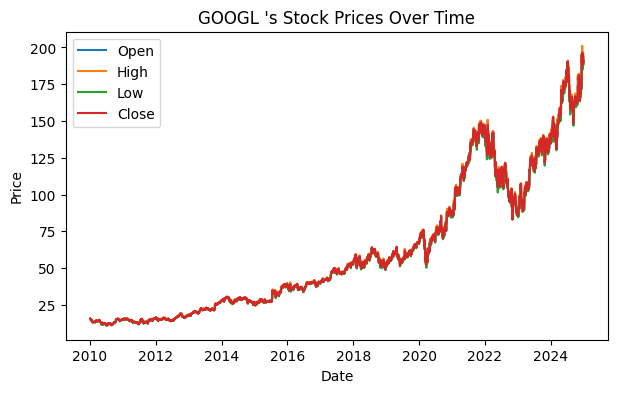

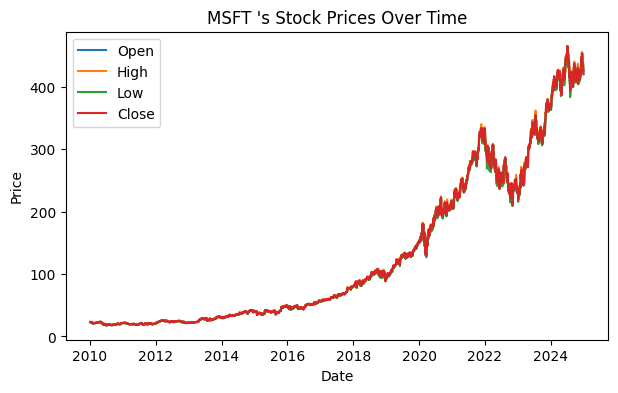

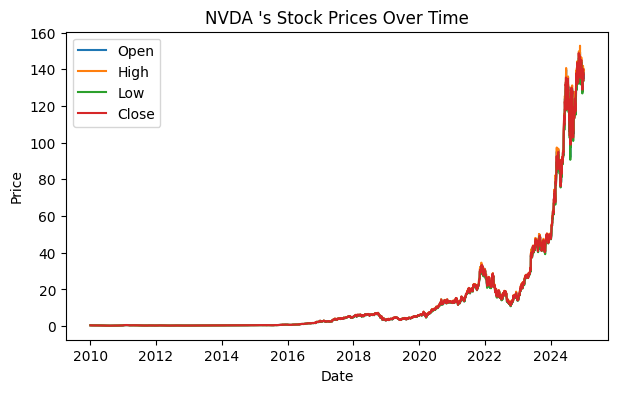

In [179]:
# OHLC trend for each company
for company in companies:
    plt.figure(figsize=(7,4))
    plt.plot(data.index, data[f'Open_{company}'], label='Open')
    plt.plot(data.index, data[f'High_{company}'], label='High')
    plt.plot(data.index, data[f'Low_{company}'], label='Low')
    plt.plot(data.index, data[f'Close_{company}'], label='Close')
    plt.title(f'{company} \'s Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


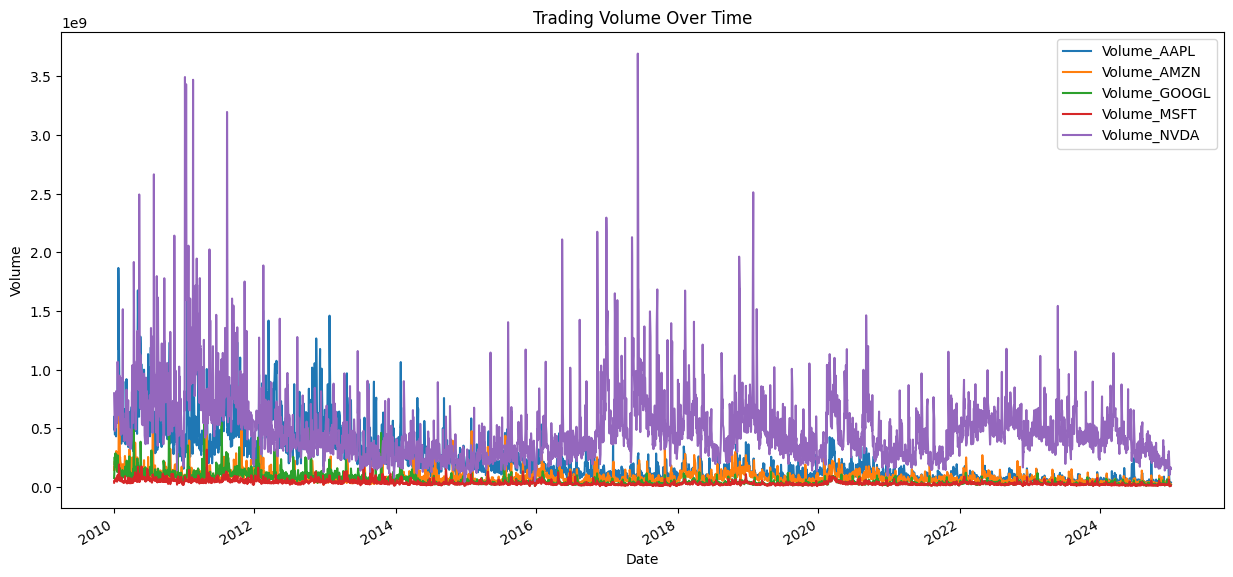

In [180]:
# Volume comparison for all companies
volume_cols = ['Volume_AAPL', 'Volume_AMZN', 'Volume_GOOGL', 'Volume_MSFT', 'Volume_NVDA']

data[volume_cols].plot(figsize=(15,7))
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


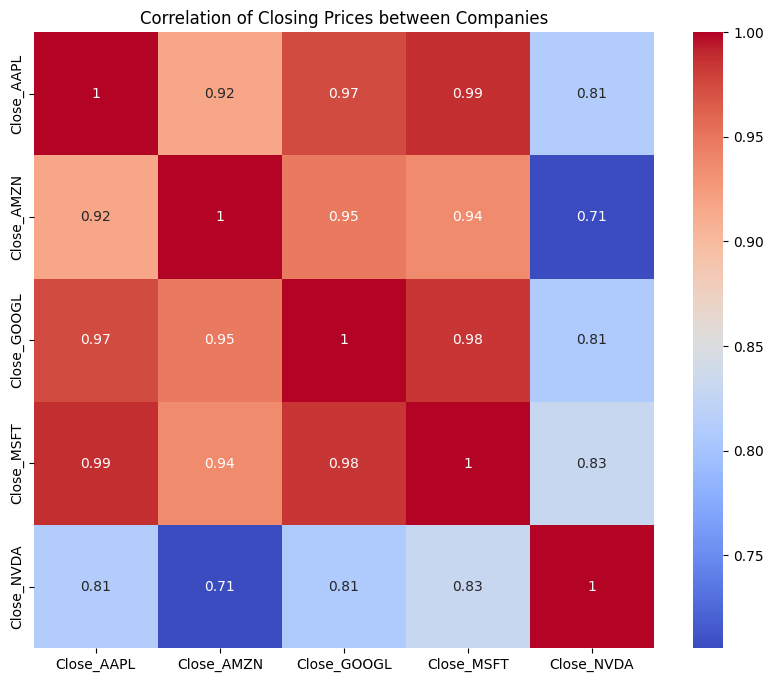

In [181]:
# Extract only closing prices
closing_prices = data[['Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT', 'Close_NVDA']]

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(closing_prices.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Closing Prices between Companies')
plt.show()


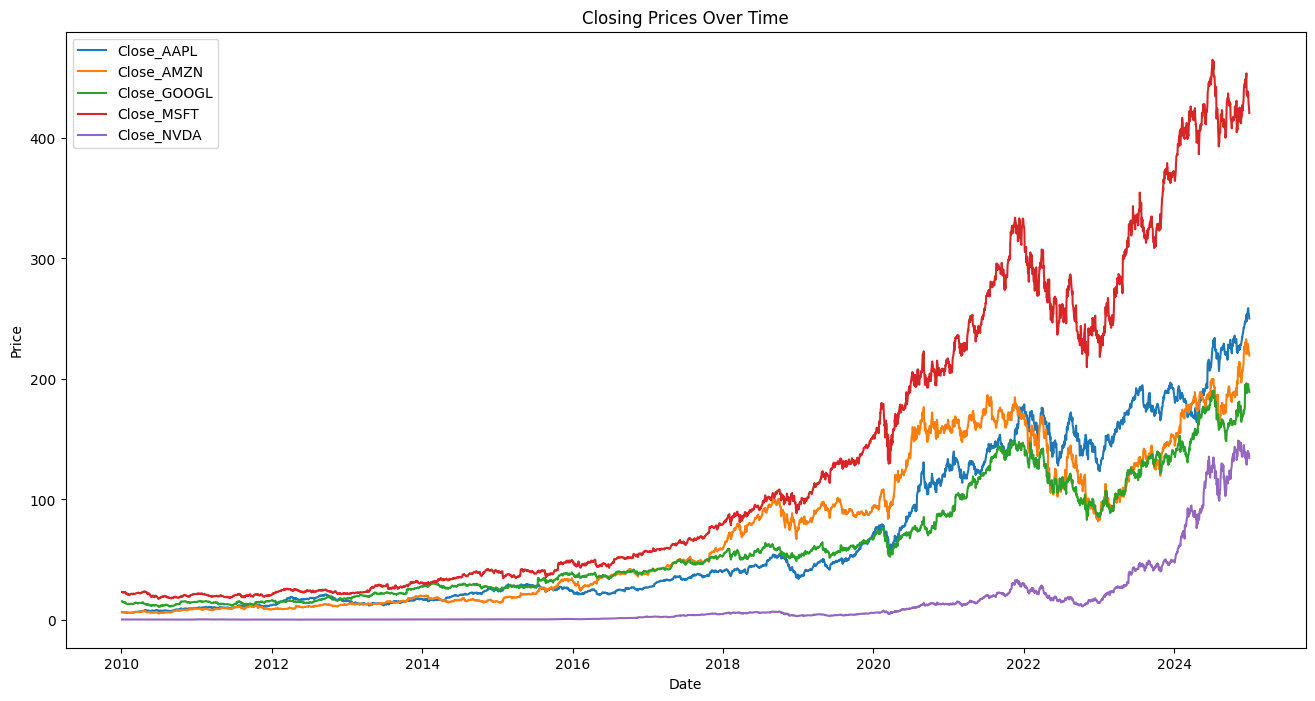

In [182]:
# Line plot
plt.figure(figsize=(16,8))
for company in closing_prices.columns:
    plt.plot(data.index, data[company], label=company)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Step 3: Feature Engineering
Add technical indications as new feature that will make the model more accurate and the results more insightful.
The technical indicators are:
* The daily return on investment
* The average closing price over the last n days (Simple Moving Average)
* The exponential average price which gives more weight to recent prices, so it reacts faster than SMA. (Exponential Moving Average)
* The volatility, which is the standard deviation of the return
* The momentum, which is the difference between today's price and the price from n days ago.
* The target is added for binary classification and is telling the model what to learn.


In [183]:
for company in companies:
    # Calculate the daily return of each stock
    data[f'Return_{company}'] = data[f'Close_{company}'].pct_change()
    # Calculating the average closing price over the last n days
    data[f'SMA_10_{company}'] = data[f'Close_{company}'].rolling(window=10).mean()
    data[f'SMA_50_{company}'] = data[f'Close_{company}'].rolling(window=50).mean()
    # Calculating the Exponential Moving Average
    data[f'EMA_20_{company}'] = data[f'Close_{company}'].ewm(span=20).mean()# Calculate the volatility of return
    data[f'Volatility_{company}'] = data[f'Return_{company}'].rolling(window=10).std()
    # Calculate the momentum for each stock
    data[f'Momentum_{company}'] = data[f'Close_{company}'] - data[f'Close_{company}'].shift(10)
    # Adding the binary classification
    data[f'Target_{company}'] = np.where(data[f'Close_{company}'].shift(-1) > data[f'Close_{company}'], 1, 0)

In [184]:
# Cleaning after adding the indicators
data.dropna(inplace=True)  # Removes NaNs caused by rolling/shift


<Axes: xlabel='Date'>

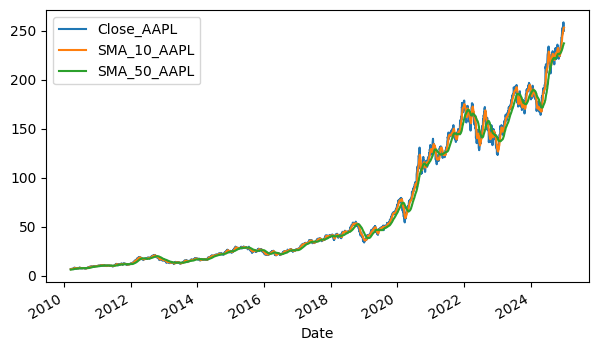

In [185]:
# Ploting the indicators to verify the correctness
data[['Close_AAPL', 'SMA_10_AAPL', 'SMA_50_AAPL']].plot(figsize=(7, 4))


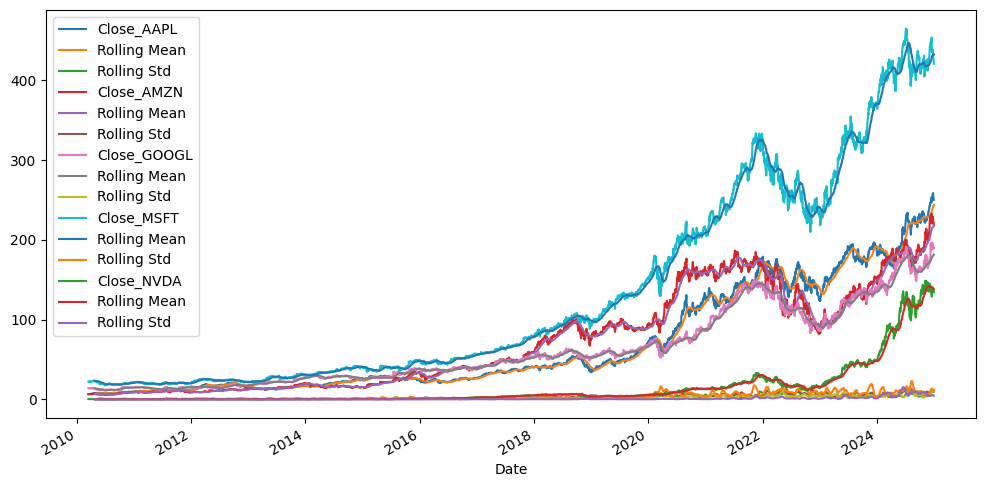

In [186]:
for company in companies:
    rolling_mean = data[f'Close_{company}'].rolling(window=30).mean()
    rolling_std = data[f'Close_{company}'].rolling(window=30).std()

    data[f'Close_{company}'].plot(figsize=(12,6))
    rolling_mean.plot(label='Rolling Mean')
    rolling_std.plot(label='Rolling Std')
    plt.legend()


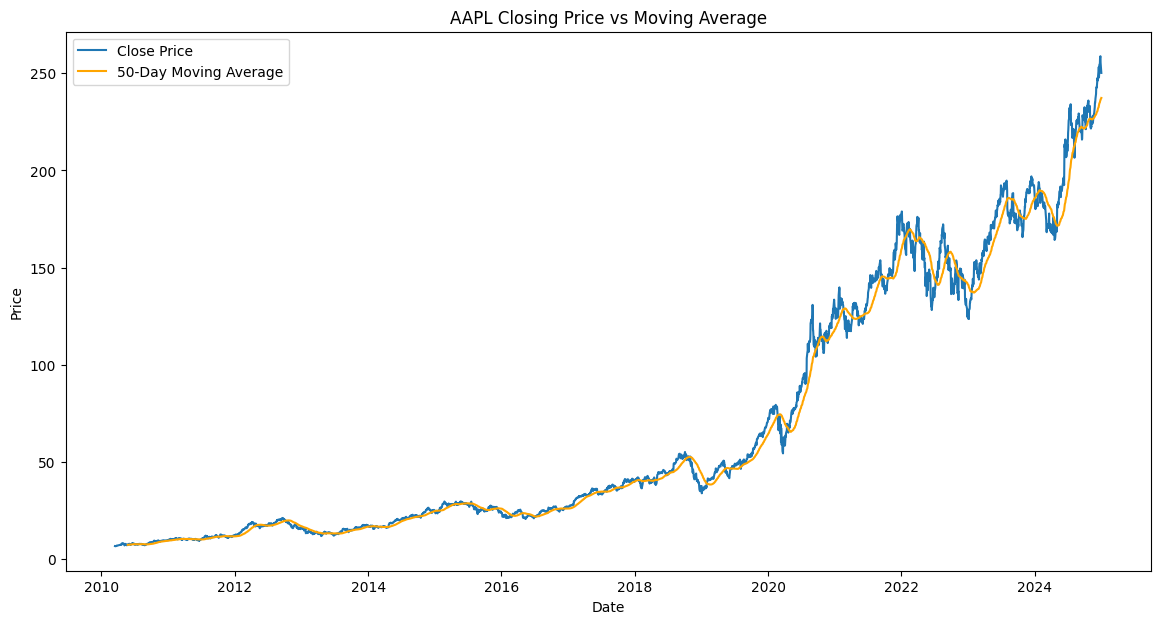

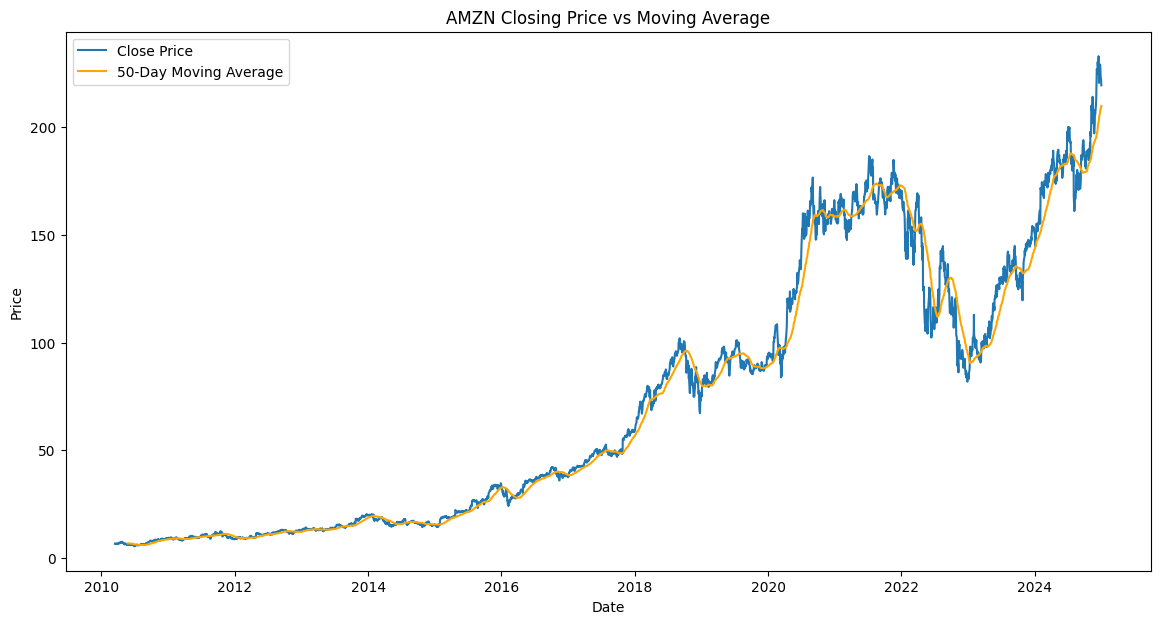

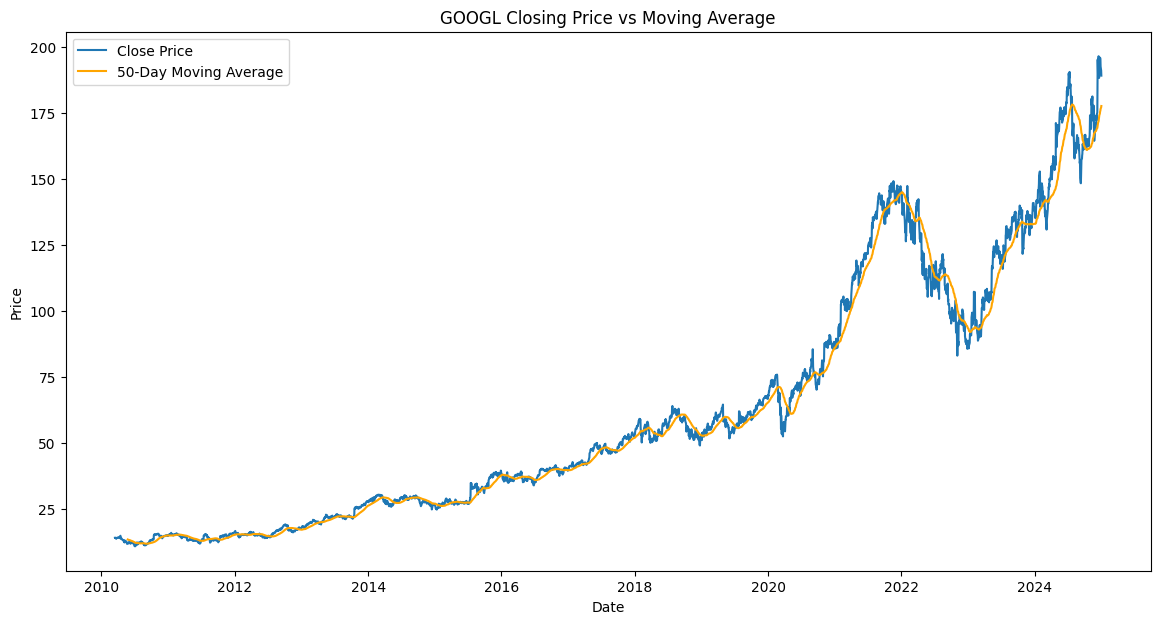

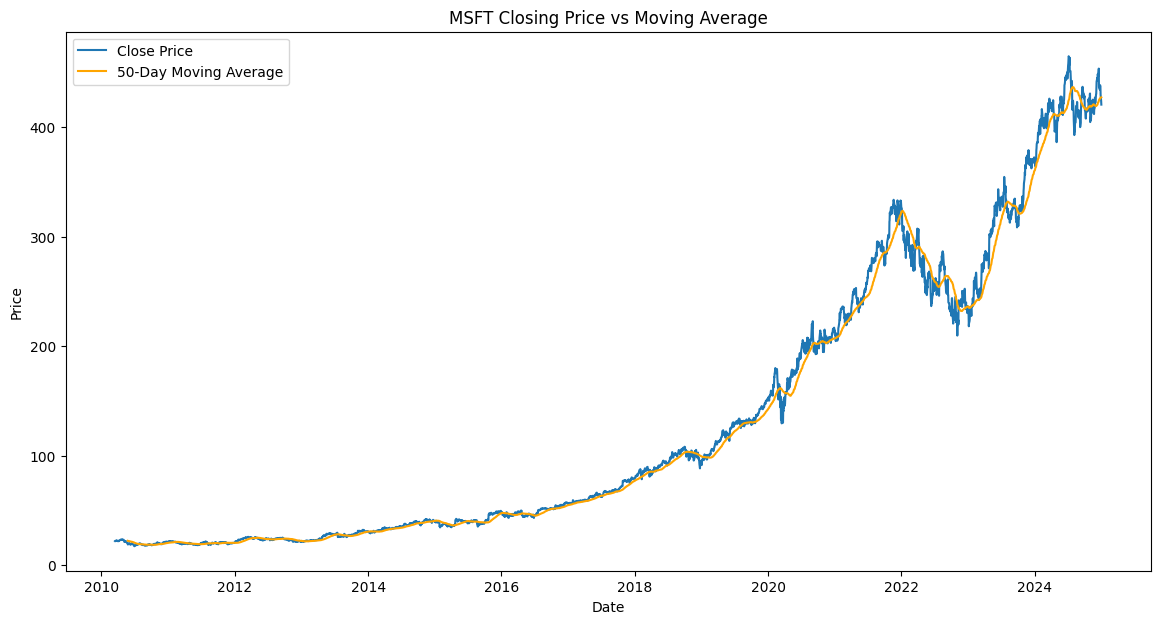

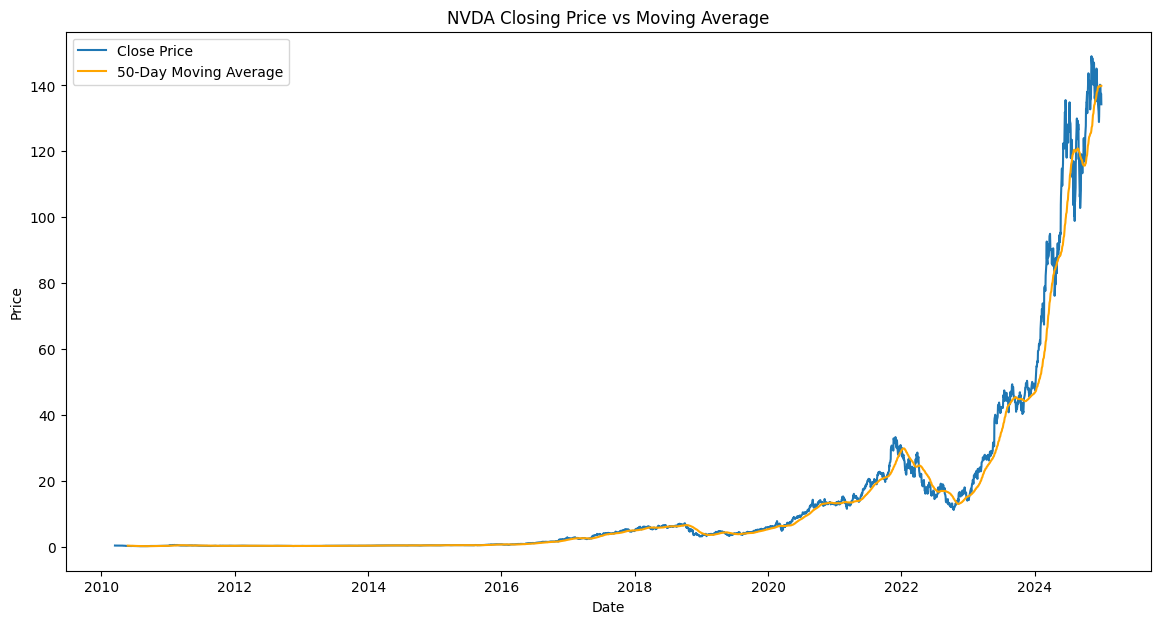

In [187]:
for company in companies:
    # Moving Average
    data[f'MA50_{company}'] = data[f'Close_{company}'].rolling(window=50).mean()

    plt.figure(figsize=(14,7))
    plt.plot(data[f'Close_{company}'], label='Close Price')
    plt.plot(data[f'MA50_{company}'], label='50-Day Moving Average', color='orange')
    plt.title(f'{company} Closing Price vs Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
